In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [3]:
df = pd.read_csv('Flight_Status.txt')

In [4]:
df.head()

,Temperature,Wind Speed,Humidity,Flight Status
0,32.5,10.2,45.3,Fly
1,28.4,12.1,60.2,Fly
2,34.1,8.3,50.0,Fly
3,19.3,20.5,85.1,Don't Fly
4,5.7,35.8,90.2,Don't Fly


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    131 non-null    float64
 1   Wind Speed     131 non-null    float64
 2   Humidity       131 non-null    float64
 3   Flight Status  131 non-null    object 
dtypes: float64(3), object(1)
memory usage: 4.2+ KB


<Axes: xlabel='Flight Status', ylabel='count'>

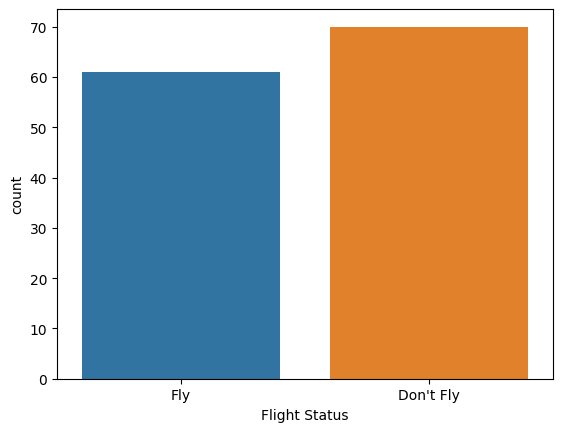

In [6]:
sns.countplot(x="Flight Status", data=df)

<Axes: xlabel='Flight Status', ylabel='Wind Speed'>

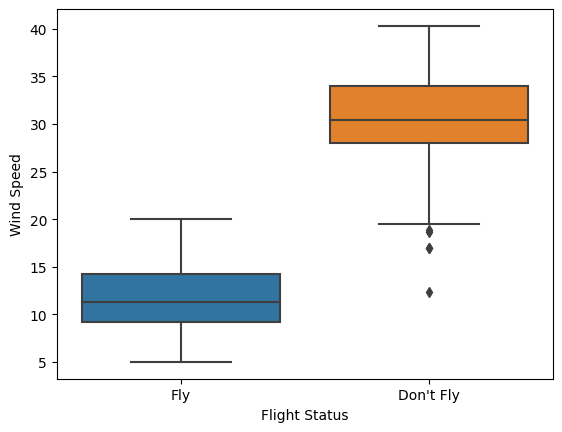

In [7]:
sns.boxplot(x='Flight Status',y='Wind Speed',data=df)

<Axes: xlabel='Flight Status', ylabel='Humidity'>

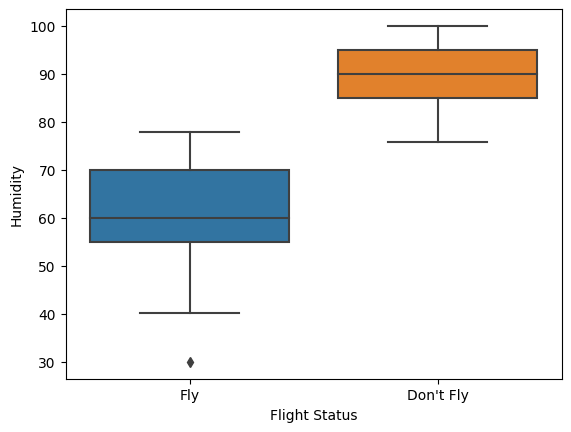

In [8]:
sns.boxplot(x='Flight Status',y='Humidity',data=df)

<Axes: xlabel='Flight Status', ylabel='Temperature'>

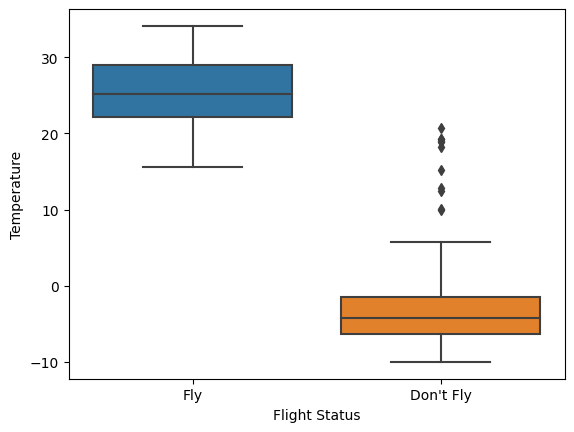

In [9]:
sns.boxplot(x='Flight Status',y='Temperature',data=df)

In [10]:
label_encoder = LabelEncoder()
df['Flight Status'] = label_encoder.fit_transform(df['Flight Status'])

In [11]:
# Get the mapping of labels to encoded values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the label mapping
print("Label Encoding Mapping:")
for label, encoded in label_mapping.items():
    print(f"{label}: {encoded}")

Label Encoding Mapping:
Don't Fly: 0
Fly: 1


In [12]:
# Features and target variable
X = df[['Temperature', 'Wind Speed', 'Humidity']]  # Features
y = df['Flight Status']  # Target

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200, multi_class='multinomial')

In [17]:
y_pred = model.predict(X_test_scaled)

In [19]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 100.00%
Confusion Matrix:
[[12  0]
 [ 0 15]]


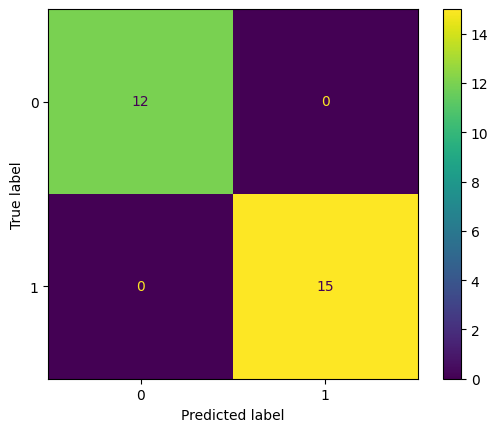

In [20]:
#Graphical Display
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [28]:
import pickle

with open('flight_status_model.pkl','wb') as f:
  pickle.dump(model ,f)

with open('flight_status_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [29]:
with open('flight_status_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Example input: wind speed = 20 km/h, temperature = 30°C, humidity = 50%
new_data = np.array([[20, 30, 60]])

# If you applied scaling before training, apply it here too
new_data_scaled = scaler.transform(new_data)

prediction = loaded_model.predict(new_data_scaled)
print("Flight Status:", "Fly" if prediction[0] == 1 else "Don't Fly")

Flight Status: Fly


C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
